In [1]:
import math
import numpy as np
import random
from matplotlib import pyplot as plt 
from tqdm import tqdm
import copy
import csv
import nbimporter
import importlib
import multiprocessing
import gc

In [2]:
# potential parameter values
StartingMarkets = ["super_realistic"]
InitialMoneyPools = [100, 1000, 10000]
LargeMarkups = [200] 
SmallMarkups = [100]
ResellerOperatingFees = [100]
WholesalerOperatingFees = [200]
MarketingBudget = [0.05]
PrPriceExps = [0.2, 0.5, 0.8] 
LenPriceExps = [3, 6, 9] 
PercentPriceChanges = [0.02, 0.05, 0.1]
PrPlanExps = [0.1, 0.3, 0.5]
LenPlanExps = [6, 9, 18]
NumDissatisfieds = [50, 100, 300]
SwitchingCostIncreases = [0.005, 0.05, 0.1]
TimeBudgets = [2, 4, 8] 
IncomeBudgets = [0.1, 0.12, 0.15] 
PrSacrificeWifis = [0.6, 0.8, 1]
#Powers = [4, 8, 16]

testing_params = []
testing_params.append(StartingMarkets)
testing_params.append(InitialMoneyPools)
testing_params.append(LargeMarkups) 
testing_params.append(SmallMarkups)
testing_params.append(ResellerOperatingFees)
testing_params.append(WholesalerOperatingFees)
testing_params.append(MarketingBudget)
testing_params.append(PrPriceExps) 
testing_params.append(LenPriceExps)
testing_params.append(PercentPriceChanges)
testing_params.append(PrPlanExps)
testing_params.append(LenPlanExps)
testing_params.append(NumDissatisfieds)
testing_params.append(SwitchingCostIncreases)
testing_params.append(TimeBudgets)
testing_params.append(IncomeBudgets)
testing_params.append(PrSacrificeWifis)
#testing_params.append(Powers)

strings = [
    'StartingMarket',
    'InitialMoneyPool',
    'LargeMarkup',
    'SmallMarkup',
    'ResellerOperatingFee',
    'WholesalerOperatingFee',
    'MarketingBudget',
    'PrPriceExp',
    'LenPriceExp',
    'PercentPriceChange',
    'PrPlanExp',
    'LenPlanExp',
    'NumDissatisfied',
    'SwitchingCostIncrease',
    'TimeBudget',
    'IncomeBudget',
    'PrSacrificeWifi']

variables = []
for i in range(len(testing_params)):
    if len(testing_params[i]) > 1:
        variables.append(i)

vectors = []
for i in variables:
    dictionary1 = {}
    for j in range(len(testing_params)):
        if i == j:
            dictionary1[strings[j]] = testing_params[j][0]
        else:
            if len(testing_params[j]) == 1:
                dictionary1[strings[j]] = testing_params[j][0] 
            else:
                dictionary1[strings[j]] = testing_params[j][1] #set to mid value
    vectors.append(dictionary1)
    if len(testing_params[i]) > 1:
        dictionary2 = copy.deepcopy(dictionary1)
        dictionary2[strings[i]] = testing_params[i][2]
        vectors.append(dictionary2)
        if i == variables[0]:
            dictionary3 = copy.deepcopy(dictionary1)
            dictionary3[strings[i]] = testing_params[i][1]
            vectors.append(dictionary3)

In [3]:
params_old = {'StartingMarket': 'super_realistic',
 'InitialMoneyPool': 1000,
 'LargeMarkup': 200,
 'SmallMarkup': 100,
 'ResellerOperatingFee': 100,
 'WholesalerOperatingFee': 200,
 'MarketingBudget': 0.05,
 'PrPriceExp': 0.5,
 'LenPriceExp': 6,
 'PercentPriceChange': 0.05,
 'PrPlanExp': 0.3,
 'LenPlanExp': 9,
 'NumDissatisfied': 100,
 'SwitchingCostIncrease': 0.05,
 'TimeBudget': 4,
 'IncomeBudget': 0.15,
 'PrSacrificeWifi': 0.8,
 'Power': 1}

In [3]:
print(len(vectors))
vectors[2] #vectors[2] is median

23


{'StartingMarket': 'super_realistic',
 'InitialMoneyPool': 1000,
 'LargeMarkup': 200,
 'SmallMarkup': 100,
 'ResellerOperatingFee': 100,
 'WholesalerOperatingFee': 200,
 'MarketingBudget': 0.05,
 'PrPriceExp': 0.5,
 'LenPriceExp': 6,
 'PercentPriceChange': 0.05,
 'PrPlanExp': 0.3,
 'LenPlanExp': 9,
 'NumDissatisfied': 100,
 'SwitchingCostIncrease': 0.05,
 'TimeBudget': 4,
 'IncomeBudget': 0.12,
 'PrSacrificeWifi': 0.8}

In [4]:
import monte_carlo as mc

In [5]:
for v in range(0, 1):
    params = params_old
    runs = 8
    MaxIter = 5001 
    data_per_run = mc.monte_carlo_parallel(runs, params, MaxIter)

    with open(f"vector{v}.txt", "w") as file1:
        for run in data_per_run:
            file1.writelines(str(run) + "*DELIMITER*")
    
    del locals()['data_per_run']
    gc.collect()

100%|██████████| 5001/5001 [10:08<00:00,  8.22it/s]


In [9]:
zero_change_run = {
 'StartingMarket': 'super_realistic', 
 'InitialMoneyPool': 1000, 
 'LargeMarkup': 200, 
 'SmallMarkup': 100, 
 'ResellerOperatingFee': 100, 
 'WholesalerOperatingFee': 200, 
 'MarketingBudget': 0.05, 
 'PrPriceExp': 0, 
 'LenPriceExp': 6, 
 'PercentPriceChange': 0, 
 'PrPlanExp': 0, 
 'LenPlanExp': 6, 
 'NumDissatisfied': 0, 
 'SwitchingCostIncrease': 1, 
 'TimeBudget': 1, 
 'IncomeBudget': 0.12, 
 'PrSacrificeWifi': 1}

In [6]:
new_v = {
 'StartingMarket': 'super_realistic', 
 'InitialMoneyPool': 1000, 
 'LargeMarkup': 200, 
 'SmallMarkup': 100, 
 'ResellerOperatingFee': 100, 
 'WholesalerOperatingFee': 200, 
 'MarketingBudget': 0.05, 
 'PrPriceExp': 0.5, 
 'LenPriceExp': 6, 
 'PercentPriceChange': 0.05, 
 'PrPlanExp': 0.3, 
 'LenPlanExp': 9, 
 'NumDissatisfied': 50, 
 'SwitchingCostIncrease': 0.1, 
 'TimeBudget': 3, 
 'IncomeBudget': 0.15, 
 'PrSacrificeWifi': 0.6, 
}

In [5]:


PLEASE DO NOT TOUCH
LAPTOP RUNNING CODE AND NEEDS
TO BE CONNECTED TO POWER






profit_changes = []
affordability_by_quintile = []
affordability_by_RA = []
subs_per_service = []
bundle_types = []
num_real_problems = []
HHIs = []
nbn_revenues = []
total_population = []


for run in data_per_run:
    profit_changes.append(run[0])
    affordability_by_quintile.append(run[1])
    affordability_by_RA.append(run[2])
    subs_per_service.append(run[3])
    bundle_types.append(run[4])
    num_real_problems.append(run[5])
    HHIs.append(run[6])
    nbn_revenues.append(run[7])
    total_population.append(run[8])
'''   
with open("profit_changes0", "w") as file2:
    for run in profit_changes:
        file2.writelines(str(run))
with open("affordability_per_quintile0", "w") as file2:
    for run in affordability_by_quintile:
        file2.writelines(str(run))
with open("affordability_per_RA0", "w") as file2:
    for run in affordability_by_RA:
        file2.writelines(str(run))
with open("subs_per_service0", "w") as file2:
    for run in subs_per_service:
        file2.writelines(str(run))
with open("bundle_types0", "w") as file2:
    for run in bundle_types:
        file2.writelines(str(run))
with open("num_real_problems0", "w") as file2:
    for run in num_real_problems:
        file2.writelines(str(run))
with open("HHIs0", "w") as file2:
    for run in HHIs:
        file2.writelines(str(run))
with open("nbn_revenues0", "w") as file2:
    for run in nbn_revenues:
        file2.writelines(str(run))
with open("total_population0", "w") as file2:
    for run in total_population:
        file2.writelines(str(run) + ", ")'''

dummy = "dummy"

In [ ]:
copy1 = copy.deepcopy(data_per_run)

In [ ]:
copy2 = copy.deepcopy(data_per_run)

In [10]:
def graph_HHI_monte_carlo(HHIs:list, runs:int, mobile:bool):
    #x = [0, 100, 500, 1000, 2000, 3000, 4000, 5000]
    x = [i for i in range(10)]
    colours = ["forestgreen", "limegreen", "darkgreen", "green", "lime", "seagreen", "mediumseagreen", "springgreen", "mediumaquamarine", "aquamarine", "turquoise", "lightseagreen", "mediumturquoise", "lightcyan", "paleturquoise", "darkslategray", "teal", "darkcyan", "c", "cyan", "darkturquoise", "cadetblue", "powderblue", "lightblue"]
    for run in range(runs):
        y = []
        if mobile:
            tuple_index = 0
        else:
            tuple_index = 1
        for timestep in range(len(x)):
            y.append(HHIs[run][timestep][tuple_index])
        plt.plot(x, y, color=colours[run], linestyle="solid", marker="8")

    plt.xlabel("X-Axis")
    plt.ylabel("Y-Axis")
    plt.title("HHI at different timesteps")
    plt.xticks(x[1:])
    plt.xlim(0, 10)
    plt.show()

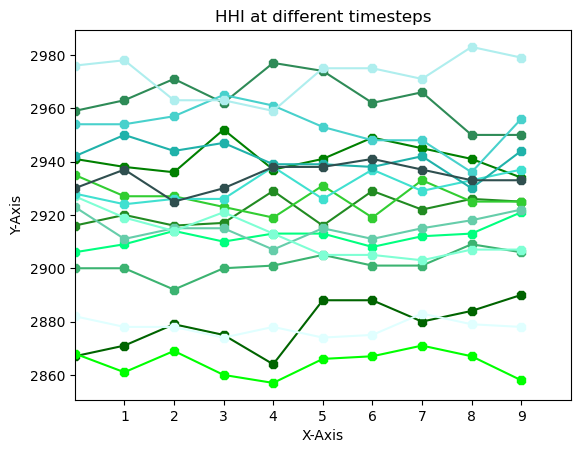

In [11]:
graph_HHI_monte_carlo(HHIs, runs, True)

In [ ]:
def graph_quintile_barchart_distribution(affordability_data_per_run, timestep, quintile, affordability_category):
    x_bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    y_bars = [0]*len(x_bins)
    for run in affordability_data_per_run:
        stat = run[timestep][quintile-1][affordability_category]          
        for x_bin in range(len(x_bins)):
            if stat <= x_bins[x_bin]:
                y_bars[x_bin] += 1
                break
    for x_bin in range(len(x_bins)):
        x_bins[x_bin] = str(x_bins[x_bin])
    plt.bar(x_bins[1:], y_bars[1:])
    plt.ylim(0, 20)
    plt.show()

In [ ]:
timestep = -1
quintile = 3
affordability_category = 2
graph_quintile_barchart_distribution(affordability_data_per_run1, timestep, quintile, affordability_category)

In [16]:
for var in list(locals().keys()):
        if var != 'data':
            del locals()[var]

var
_i
_ii
_iii
_i16
__builtins__


In [ ]:
print